# ---- PROJECT TRAJECTORY -----

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
barrier = [500, 1000, 50]
time_range = [0, 50, 0.1]  # StartTime,EndTime,Step
v = 60  # Speed of shot

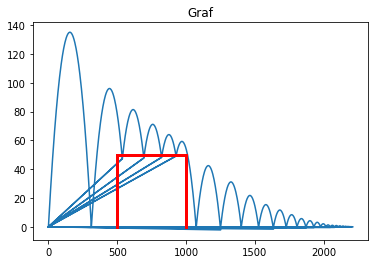

In [1]:
# Barrier definition
line_1_x = np.full(barrier[2], barrier[0])
line_1_y = np.arange(0, barrier[2], 1)
line_2_x = np.arange(barrier[0], barrier[1], 1)
line_2_y = np.full(barrier[1] - barrier[0], barrier[2])
line_3_x = np.full(barrier[2], barrier[1])
line_3_y = np.arange(0, barrier[2], 1)


# Move of x
def f_x(a, c, t):
    x = a * t + c
    return x


# Move of y
def f_y(a, b, c, t):
    y = a * t ** 2 + b * t + c
    return y


# Calculation of trajectory
def trajectory(t1, a1, c1, a2, b2, c2, ground_hit, wall_hit, top_hit):  # ,x_start,y_start):
    down = False  # default direction (gradient) is UP
    x_val, y_val, grad_val = [0], [0], [0]
    t = t1
    while wall_hit == False and ground_hit == False and top_hit == False:  # it runs while do not hit 
#        the barrier or ground
        x = f_x(a1, c1, t)  # calculation of x
        y = f_y(a2, b2, c2, t)  # calculation of y
        grad_y = y - y_val[-1]  # calculation of the y component of the gradient
        v_y_calc = grad_y / time_range[2]  # calculation of the y component of a speed
        x_val.append(x), y_val.append(y), grad_val.append(grad_y)

        if grad_y < 0:
            down = True  # direction of the trajectory is down
        else:
            down = False  # direction of the trajectory is up

        if y < 0:  # hit of the ground
            ground_hit = True
            v_x_hit, v_y_hit = x, y
            return x_val, y_val, grad_val, v_x_hit, v_y_hit, ground_hit, top_hit, grad_y, v_y_calc

        if (x > barrier[0] and y < barrier[2]) and (x < barrier[1] and y < barrier[2]) and down:  # hit of the barrier
            top_hit = True
            v_x_hit, v_y_hit = x_val[-1], y_val[-1]
            return x_val, y_val, grad_val, v_x_hit, v_y_hit, ground_hit, top_hit, grad_y, v_y_calc

        t = t + time_step
    return x_val, y_val, v_x_hit, v_y_hit, ground_hit




In [ ]:
# PROGRAM

# Variables init
time_step = time_range[2]
data_x, data_y = [], []
final_data_x, final_data_y, final_grad = [], [], []
ground_hit, wall_hit, top_hit = False, False, False

#
for angle in [60]:
    t1 = time_range[0]
    v_x, v_y = v * np.cos(angle * 2 * np.pi / 360), v * np.sin(angle * 2 * np.pi / 360)
    tmp_x, tmp_y, tmp_grad = [], [], []
    C1, C2 = 0, 0
    x_start, y_start, v_x_hit, v_y_hit, grad_y = 0, 0, 0, 0, 0

    while ground_hit == False and v_y > 0.5:
        data_x, data_y, data_grad, v_x_hit, v_y_hit, ground_hit, top_hit, grad_y, v_y_calc = trajectory(t1, v_x, C1,
                                                                                                        -1 / 2 * 10,
                                                                                                        v_y, C2,
                                                                                                        ground_hit,
                                                                                                        wall_hit,
                                                                                                        top_hit)  # ,v_x_hit,v_y_hit)

        if ground_hit == True:
            v_y = -v_y_calc * 0.85
            C1 = v_x_hit
            C2 = 0
            ground_hit = False

        if top_hit == True:
            v_y = -v_y_calc * 0.85
            C1 = v_x_hit
            C2 = v_y_hit
            top_hit = False

        tmp_x, tmp_y, tmp_grad = tmp_x + data_x, tmp_y + data_y, tmp_grad + data_grad

    final_data_x, final_data_y, final_grad = final_data_x + tmp_x, final_data_y + tmp_y, final_grad + tmp_grad

plt.title('Graf')
plt.plot(final_data_x, final_data_y)

# print of the gradient vector - does not work plt.quiver([final_data_x], [final_data_y], [time_step], [final_grad],
# angles='xy', scale_units='xy', scale=1,color=['y'])

plt.plot(line_1_x, line_1_y, color='red', linewidth=3)
plt.plot(line_2_x, line_2_y, color='red', linewidth=3)
plt.plot(line_3_x, line_3_y, color='red', linewidth=3)
plt.show()
